**Plotting function**

The function defined here takes `activations`, `task_labels` and `plot_type` and generates a heatmap that gives either

- the mean activation value of each unit across examples of each task (if `plot_type == "mean_activation"`, or
- the fraction of examples across each task for which each unit is ON after k-Winners (if `plot_type == "percent_on"`).

In [77]:
import numpy as np
import torch

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})


def plot(activations, task_labels, plot_type):
    assert plot_type in ("mean_activation", "percent_on"), ("plot type must be either "
    "'mean_activation' or 'percent_on'")

    # STEP 1: compute the array that we're going to plot
    with torch.no_grad():
        device = activations.device
        num_tasks = 1 + task_labels.max().item()
        _, num_units = activations.size()
        h = torch.zeros((0, num_units))
        h = h.to(device)
        for t in range(num_tasks):
            inds_t = torch.nonzero((task_labels == t).float(), as_tuple=True)
            h_t = activations[inds_t]
            if plot_type == "percent_on":
                h_t = (h_t != 0).float()
            h_t = h_t.mean(dim=0)
            h_t = h_t.unsqueeze(0)
            h = torch.cat((h, h_t))

    # STEP 2: plotting
    NUM_UNITS_TO_PLOT = 64
    h = h[:, :NUM_UNITS_TO_PLOT]
    h = h.detach().cpu().numpy()

    max_val = np.abs(h).max()
    if plot_type == "mean_activation":
        plt.imshow(h, cmap="PiYG", vmin=-max_val, vmax=max_val)
    else:
        plt.imshow(h, cmap="Greens", vmin=0.0, vmax=max_val)

    plt.xlabel("hidden unit")
    plt.ylabel("task")

    # These next 2 lines stretch the figure vertically
    ax = plt.gca()
    ax.set_aspect(2.5)

    ax.get_yaxis().set_ticks([])

    plt.tight_layout()
    plt.show()


**Generating plots with saved data**

The centroid script outputs `.pt` files which represent the activations and task labels. Specify these below to generate plots. Make sure that the 'key' in the file name is the same for both the activations and task labels.

plot type: mean_activation


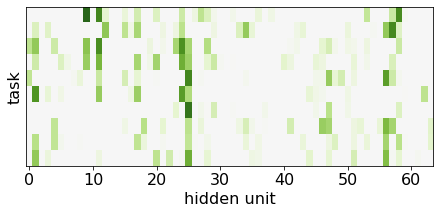

plot type: percent_on


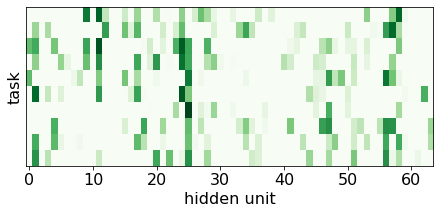

In [80]:
if __name__ == "__main__":

    # Load data and plot

    # NOTE: the user must edit the filenames below

    X = torch.load("x_10_layer_activations.1_yqrs.pt", map_location=torch.device("cpu"))
    y = torch.load("y_10_layer_activations.1_yqrs.pt", map_location=torch.device("cpu"))

    for plot_type in ("mean_activation", "percent_on"):
        plt.cla()
        print(f"plot type: {plot_type}")
        plot(X, y, plot_type)